In [ ]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "diabetes_prediction_dataset.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "iammustafatz/diabetes-prediction-dataset",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

/tmp/ipython-input-3231329935.py:10: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 734k/734k [00:00<00:00, 64.7MB/s]

Extracting zip of diabetes_prediction_dataset.csv...
First 5 records:    gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Example: encode gender
df['gender'] = LabelEncoder().fit_transform(df['gender'])
df = pd.get_dummies(df, columns=['smoking_history'], drop_first=True)

Accuracy: 0.97215
Confusion Matrix:
 [[18292     0]
 [  557  1151]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99     18292
           1       1.00      0.67      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.99      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000



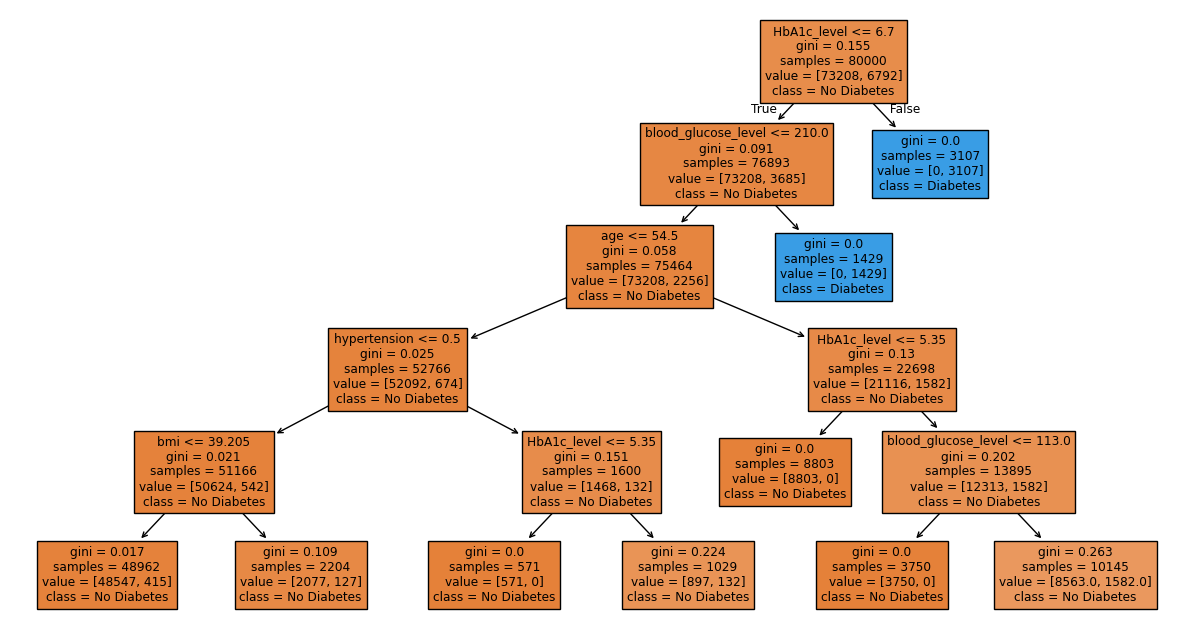

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

#df is already loaded from kagglehub
#Define features and target
X = df.drop("diabetes", axis=1)
y = df["diabetes"]

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#Train Decision Tree
model = DecisionTreeClassifier(criterion="gini",max_depth=5, random_state=42)
model.fit(X_train, y_train)

#Predictions
y_pred = model.predict(X_test)

#Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

#Visualize the tree
plt.figure(figsize=(15,8))
plot_tree(model, feature_names=X.columns, class_names=["No Diabetes","Diabetes"], filled=True)
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Features and target
X = df.drop("diabetes", axis=1)
y = df["diabetes"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree with Gini
tree_gini = DecisionTreeClassifier(criterion="gini", max_depth=4, random_state=42)
tree_gini.fit(X_train, y_train)
y_pred_gini = tree_gini.predict(X_test)
acc_gini = accuracy_score(y_test, y_pred_gini)

# Decision Tree with Entropy
tree_entropy = DecisionTreeClassifier(criterion="entropy", max_depth=4, random_state=42)
tree_entropy.fit(X_train, y_train)
y_pred_entropy = tree_entropy.predict(X_test)
acc_entropy = accuracy_score(y_test, y_pred_entropy)

print("Accuracy with Gini:", acc_gini)
print("Accuracy with Entropy:", acc_entropy)

Accuracy with Gini: 0.97215
Accuracy with Entropy: 0.97215
